In [1]:
def one_tensor(M,N):
    mn=[]
    for i in range(len(M)):
        for j in range(len(N)):
            mn.append(M[i]*N[j])
    return mn

In [2]:
# Find  𝑢⊗𝑣 and  𝑣⊗𝑢 for the vectors 

v=[1,2,3]
u=[-2,-1,0,1]

uv=one_tensor(u,v)
vu=one_tensor(v,u);


print("uv=",uv)

print("vu=",vu)


uv= [-2, -4, -6, -1, -2, -3, 0, 0, 0, 1, 2, 3]
vu= [-2, -1, 0, 1, -4, -2, 0, 2, -6, -3, 0, 3]


In [3]:
#defining tensor function
def multidim_tensor(M,N):
    MN=[]

    col=len(M[0])*len(N[0])
    row=len(M)*len(N)

    for i in range(row):
        MN.append([])
        for j in range(col):
            MN[i].append(0)
        

    for i in range(len(M)):#
        for j in range(len(M[0])):
            m = M[i][j]
            for k in range(len(N)):
                for l in range(len(N[0])):
                    n = N[k][l]
                    MN[i*len(M[0])+k][len(N[0])*j+l] = m*n
                
    return MN

In [16]:
# matrix M
M = [ 
    [-1,0,1],
    [-2,-1,2],
    [1,2,-2]
]

# matrix N
N = [
    [0,2,1],
    [3,-1,-2],
    [-1,1,0]
    ]

mn=multidim_tensor(N,M)

for i in range(len(mn)):
    print(mn[i])

[0, 0, 0, -2, 0, 2, -1, 0, 1]
[0, 0, 0, -4, -2, 4, -2, -1, 2]
[0, 0, 0, 2, 4, -4, 1, 2, -2]
[-3, 0, 3, 1, 0, -1, 2, 0, -2]
[-6, -3, 6, 2, 1, -2, 4, 2, -4]
[3, 6, -6, -1, -2, 2, -2, -4, 4]
[1, 0, -1, -1, 0, 1, 0, 0, 0]
[2, 1, -2, -2, -1, 2, 0, 0, 0]
[-1, -2, 2, 1, 2, -2, 0, 0, 0]


In [17]:
M=[
    [-1,0,1],
    [-2,-1,2]
]

N=[
    [0,2],
    [3,-1],
    [-1,1]
]

mn=multidim_tensor(M,N)

for i in range(len(mn)):
    print(mn[i])

[0, -2, 0, 0, 0, 2]
[-3, 1, 0, 0, 3, -1]
[1, -1, 0, 0, -1, 1]
[0, -4, 0, -2, 0, 4]
[-6, 2, -3, 1, 6, -2]
[2, -2, 1, -1, -2, 2]


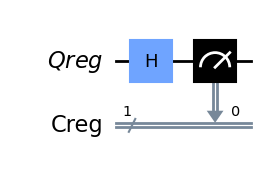

In [6]:
#1 qubit system
#when using one beam splitter
from qiskit import *

q=QuantumRegister(1,"Qreg")
c=ClassicalRegister(1,"Creg")

qc=QuantumCircuit(q,c)

qc.h(q)#random spin

qc.measure(q,c)

qc.draw(output="mpl")

In [7]:
backend=Aer.get_backend("qasm_simulator")

jobs=execute(qc,backend,shots=1000)
counts=jobs.result().get_counts(qc)

n_zero=counts['0']
n_one=counts['1']

print("Spin up probability= ",n_zero/1000)
print("Spin up probability= ",n_one/1000)

print(counts)


Spin up probability=  0.49
Spin up probability=  0.51
{'0': 490, '1': 510}


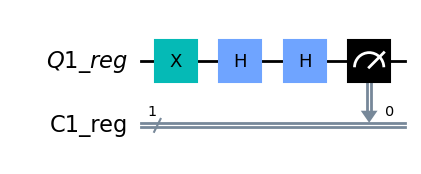

In [8]:
#interference of state

q1=QuantumRegister(1,"Q1_reg")

c1=ClassicalRegister(1,"C1_reg")

qc1=QuantumCircuit(q1,c1)

qc1.x(q1)#change the spin to spin up

qc1.h(q1)#random spin

qc1.h(q1)

qc1.measure(q1,c1)

qc1.draw(output="mpl")

In [9]:
backend2=Aer.get_backend("qasm_simulator")

jobs=execute(qc1,backend2,shots=1000)

counts=jobs.result().get_counts(qc1)

print(counts)

{'1': 1000}


In [10]:
#using bloch sphere unit circle
from random import randrange
from math import sin,cos, pi

random_angle=randrange(360)

radian_angle=random_angle*pi/180

expected_value_of_0=cos(radian_angle)**2
expected_value_of_1=sin(radian_angle)**2

print(round(expected_value_of_0,3))
print(round(expected_value_of_1,3))

0.265
0.735


In [19]:
#2 qubit system  #### Verify the vector representations of  |00⟩,|01⟩,|10⟩,|11⟩
zero=[1,0]
one=[0,1]

OO=one_tensor(zero,zero)
Ol=one_tensor(zero,one)
lO=one_tensor(one,zero)
ll=one_tensor(one,one)
print("|00>= ",OO)
print("|01>= ",Ol)
print("|10>= ",lO)
print("|11>= ",ll)

|00>=  [1, 0, 0, 0]
|01>=  [0, 1, 0, 0]
|10>=  [0, 0, 1, 0]
|11>=  [0, 0, 0, 1]


In [20]:
#phasekickback and superposition
from qiskit import *
import numpy as np

q=QuantumRegister(2)
c=ClassicalRegister(2)

qc=QuantumCircuit(q,c)

qc.x(q[0])
qc.barrier()
print("Initial State")
backend=Aer.get_backend("statevector_simulator")
job=execute(qc,backend,shots=1000)
result=job.result()
statevector=result.get_statevector()
np.around(statevector,2)


Initial State


array([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j])

In [21]:
qc.h([1,0])

qc.cx(1,0)

qc.h([1,0])
print("Final state")
job=execute(qc,backend,shots=1000)
result=job.result()
statevector=result.get_statevector()
np.around(statevector,2)

Final state


array([-0.+0.j,  0.+0.j,  0.+0.j,  1.-0.j])

In [34]:
#Generetion of the 4 bell entangle state

# 1/sqrt(2) *(|00>+|11>)
from qiskit import *
import numpy as np

q=QuantumRegister(2,"Q")
c=ClassicalRegister(2,"C")

qc=QuantumCircuit(q,c)

qc.h(1)

qc.barrier()

qc.cx(1,0)

backend=Aer.get_backend("statevector_simulator")

job=execute(qc,backend,shots=1000)
result=job.result()
statevector=result.get_statevector()
np.around(statevector,2)

array([0.71+0.j, 0.  +0.j, 0.  +0.j, 0.71+0.j])

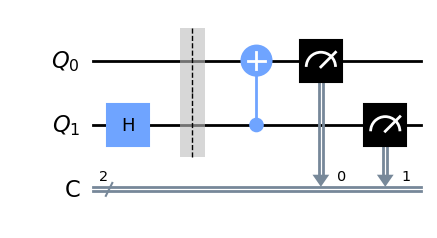

In [35]:
qc.measure(q,c)
qc.draw(output="mpl")

In [39]:
# 1/sqrt(2) *(|00>-|11>)

from qiskit import *
import numpy as np

q=QuantumRegister(2,"Q")
c=ClassicalRegister(2,"C")

qc=QuantumCircuit(q,c)

qc.h(1)
qc.z(1)

qc.barrier()

qc.cx(1,0)
backend=Aer.get_backend("statevector_simulator")

job=execute(qc,backend,shots=1000)
result=job.result()
statevector=result.get_statevector()
np.around(statevector,2)

array([ 0.71+0.j,  0.  +0.j,  0.  +0.j, -0.71-0.j])

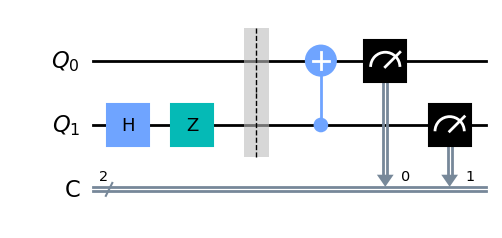

In [40]:
qc.measure(q,c)
qc.draw(output="mpl")

In [3]:
# 1/sqrt(2) *(|01>+|10>)
from qiskit import *
import numpy as np

q=QuantumRegister(2,"Q")
c=ClassicalRegister(2,"C")

qc=QuantumCircuit(q,c)

qc.x(0)
qc.h(1)

qc.barrier()

qc.cx(1,0)
backend=Aer.get_backend("statevector_simulator")

job=execute(qc,backend,shots=1000)
result=job.result()
statevector=result.get_statevector()
np.around(statevector,2)

array([0.  +0.j, 0.71+0.j, 0.71+0.j, 0.  +0.j])

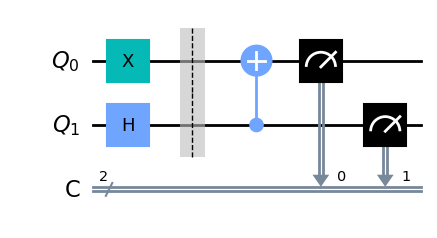

In [4]:
qc.measure(q,c)
qc.draw(output="mpl")

In [5]:
#
from qiskit import *
import numpy as np

q=QuantumRegister(2,"Q")
c=ClassicalRegister(2,"C")

qc=QuantumCircuit(q,c)

qc.x([0,1])
qc.h(1)

qc.barrier()

qc.cx(1,0)
backend=Aer.get_backend("statevector_simulator")

job=execute(qc,backend,shots=1000)
result=job.result()
statevector=result.get_statevector()
np.around(statevector,2)

array([ 0.  +0.j,  0.71+0.j, -0.71-0.j,  0.  +0.j])

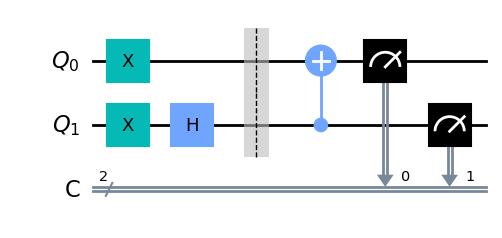

In [6]:
qc.measure(q,c)
qc.draw(output="mpl")